<a href="https://colab.research.google.com/github/Liberatofco/MineriaDatos/blob/main/Mineria_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  from google.colab import drive
  drive.mount("/content/drive")

Mounted at /content/drive


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
capitulosop = pd.read_csv("/content/drive/MyDrive/Mineria de datos/Chapters.csv", encoding='ISO-8859-1')
capitulosop

,Chapter_Number,Volume,Name,Romanized_title,Viz_title,Pages,Date,Episodes
0,1,1,Romance Dawn - The Dawn of the Adventure,Romansu Don - Boken no Yoake,Romance Dawn,53.0,"July 19, 1997",1997 Issue
1,2,1,"That Guy, ""Straw Hat Luffy""","Sono Otoko ""Mugiwara no Rufi""","They Call Him ""Straw Hat Luffy""",23.0,"July 28, 1997",1997 Issue
2,3,1,Introducing Pirate Hunter Zoro,"""Kaizoku-gari no Zoro"" Tojo",Enter Zolo: Pirate Hunter,21.0,"August 4, 1997",1997 Issue
3,4,1,"Marine Captain ""Axe-Hand Morgan""","Kaigun Taisa ""Onote no Mogan""",The Great Captain Morgan,19.0,"August 11, 1997",1997 Issue 37-
4,5,1,Pirate King and Master Swordsman,Kaizoku-O to Daikengo,The King of the Pirates and the Master Swordsman,19.0,"August 25, 1997",1997 Issue
...,...,...,...,...,...,...,...,...
1008,1009,100,Naraku,Naraku,Naraku,19.0,"April 5, 2021",2021 Issue
1009,1010,100,Haoshoku,Hao-shoku,Color of the Supreme King,17.0,"April 12, 2021",2021 Issue
1010,1011,100,The Code of Anko,Anko no Jingi,The Code of Sweet Beans,19.0,"April 26, 2021",2021 Issue 21-
1011,1012,100,Itch,Uzu,Itch,15.0,"May 10, 2021",2021 Issue


# Limpieza de datos


In [4]:
capitulosop.columns = ['Numero_capitulo','Volumen','Nombre', 'Titulo_romanji', 'Titulo_viz', 'Paginas', 'Fecha', 'Episodios']
capitulosop.dtypes

Numero_capitulo      int64
Volumen              int64
Nombre              object
Titulo_romanji      object
Titulo_viz          object
Paginas            float64
Fecha               object
Episodios           object
dtype: object

In [5]:
print(capitulosop.isnull().sum ())

Numero_capitulo    0
Volumen            0
Nombre             0
Titulo_romanji     0
Titulo_viz         0
Paginas            1
Fecha              0
Episodios          0
dtype: int64


In [6]:
print(capitulosop.loc[capitulosop['Paginas'].isnull()])

    Numero_capitulo  Volumen Nombre Titulo_romanji Titulo_viz  Paginas  \
11               12        2    Dog            Inu        Dog      NaN   

               Fecha    Episodios  
11  October 13, 1997  1997 Issue   


In [7]:
capitulosop.loc[11, 'Paginas'] = 21.0
capitulosop['Paginas'] = capitulosop['Paginas'].astype(int)
capitulosop.head(12)

,Numero_capitulo,Volumen,Nombre,Titulo_romanji,Titulo_viz,Paginas,Fecha,Episodios
0,1,1,Romance Dawn - The Dawn of the Adventure,Romansu Don - Boken no Yoake,Romance Dawn,53,"July 19, 1997",1997 Issue
1,2,1,"That Guy, ""Straw Hat Luffy""","Sono Otoko ""Mugiwara no Rufi""","They Call Him ""Straw Hat Luffy""",23,"July 28, 1997",1997 Issue
2,3,1,Introducing Pirate Hunter Zoro,"""Kaizoku-gari no Zoro"" Tojo",Enter Zolo: Pirate Hunter,21,"August 4, 1997",1997 Issue
3,4,1,"Marine Captain ""Axe-Hand Morgan""","Kaigun Taisa ""Onote no Mogan""",The Great Captain Morgan,19,"August 11, 1997",1997 Issue 37-
4,5,1,Pirate King and Master Swordsman,Kaizoku-O to Daikengo,The King of the Pirates and the Master Swordsman,19,"August 25, 1997",1997 Issue
5,6,1,The First,Hitorime,Number One,23,"September 1, 1997",1997 Issue
6,7,1,Friends,Tomodachi,Friends,20,"September 8, 1997",1997 Issue
7,8,1,Introducing Nami,Nami Tojo,Nami,19,"September 15, 1997",1997 Issue
8,9,2,The Devil Girl,Masho no Onna,Femme Fatale,21,"September 22, 1997",1997 Issue
9,10,2,Incident at the Tavern,Sakaba no Ikken,Incident at the Tavern,23,"September 29, 1997",1997 Issue


In [8]:
capitulosop.to_csv("onepiece_chapters_modificado.csv", index=False)

In [9]:
capitulosop.dtypes

Numero_capitulo     int64
Volumen             int64
Nombre             object
Titulo_romanji     object
Titulo_viz         object
Paginas             int64
Fecha              object
Episodios          object
dtype: object

In [10]:
capitulosop.head(12)

,Numero_capitulo,Volumen,Nombre,Titulo_romanji,Titulo_viz,Paginas,Fecha,Episodios
0,1,1,Romance Dawn - The Dawn of the Adventure,Romansu Don - Boken no Yoake,Romance Dawn,53,"July 19, 1997",1997 Issue
1,2,1,"That Guy, ""Straw Hat Luffy""","Sono Otoko ""Mugiwara no Rufi""","They Call Him ""Straw Hat Luffy""",23,"July 28, 1997",1997 Issue
2,3,1,Introducing Pirate Hunter Zoro,"""Kaizoku-gari no Zoro"" Tojo",Enter Zolo: Pirate Hunter,21,"August 4, 1997",1997 Issue
3,4,1,"Marine Captain ""Axe-Hand Morgan""","Kaigun Taisa ""Onote no Mogan""",The Great Captain Morgan,19,"August 11, 1997",1997 Issue 37-
4,5,1,Pirate King and Master Swordsman,Kaizoku-O to Daikengo,The King of the Pirates and the Master Swordsman,19,"August 25, 1997",1997 Issue
5,6,1,The First,Hitorime,Number One,23,"September 1, 1997",1997 Issue
6,7,1,Friends,Tomodachi,Friends,20,"September 8, 1997",1997 Issue
7,8,1,Introducing Nami,Nami Tojo,Nami,19,"September 15, 1997",1997 Issue
8,9,2,The Devil Girl,Masho no Onna,Femme Fatale,21,"September 22, 1997",1997 Issue
9,10,2,Incident at the Tavern,Sakaba no Ikken,Incident at the Tavern,23,"September 29, 1997",1997 Issue


# Estadistica Descriptiva

In [11]:
# Funciones de Agregacion

In [46]:
datos_por_tomo = capitulosop.groupby('Volumen')['Paginas'].sum()
datos_por_tomo_media = capitulosop.groupby('Volumen')['Paginas'].mean().sort_values(ascending=False)
datos_por_tomo_minima = capitulosop.groupby('Volumen')['Paginas'].min().sort_values(ascending=False)
datos_por_tomo_maxima = capitulosop.groupby('Volumen')['Paginas'].max().sort_values(ascending=False)
tabla_estadisticas = pd.concat([datos_por_tomo, datos_por_tomo_media, datos_por_tomo_maxima, datos_por_tomo_minima], axis=1)
tabla_estadisticas.columns = ['Paginas', 'Paginas Promedio', 'Maxima Paginas', 'Minima Paginas']

tabla_estadisticas.head (100)

,Paginas,Paginas Promedio,Maxima Paginas,Minima Paginas
Volumen,,,,
1,197,24.625000,53,19
2,178,19.777778,23,17
3,181,20.111111,29,19
4,175,19.444444,21,19
5,174,19.333333,21,18
...,...,...,...,...
96,174,17.400000,19,17
97,174,17.400000,19,17
98,174,17.400000,19,15


# Visualizacion de datos

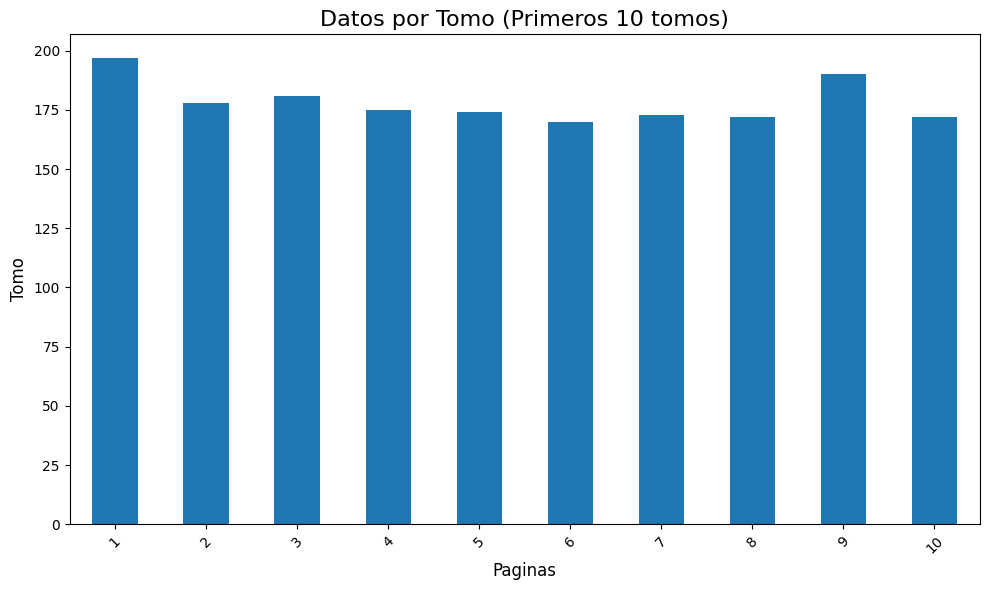

In [31]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))  

# Obtener los primeros 10 registros y graficarlos como un gráfico de barras
datos_por_tomo.head(10).plot.bar(ax=ax)

plt.title('Datos por Tomo (Primeros 10 tomos)', fontsize=16)  # Ajusta el tamaño de la fuente del título
plt.xlabel('Paginas', fontsize=12)  # Ajusta el tamaño de la fuente del eje x
plt.ylabel('Tomo', fontsize=12)  # Ajusta el tamaño de la fuente del eje y

# Ajustar la rotación de las etiquetas del eje x
plt.xticks(rotation=45)  

plt.tight_layout()  # Ajusta el espacio entre los elementos del gráfico
plt.show()

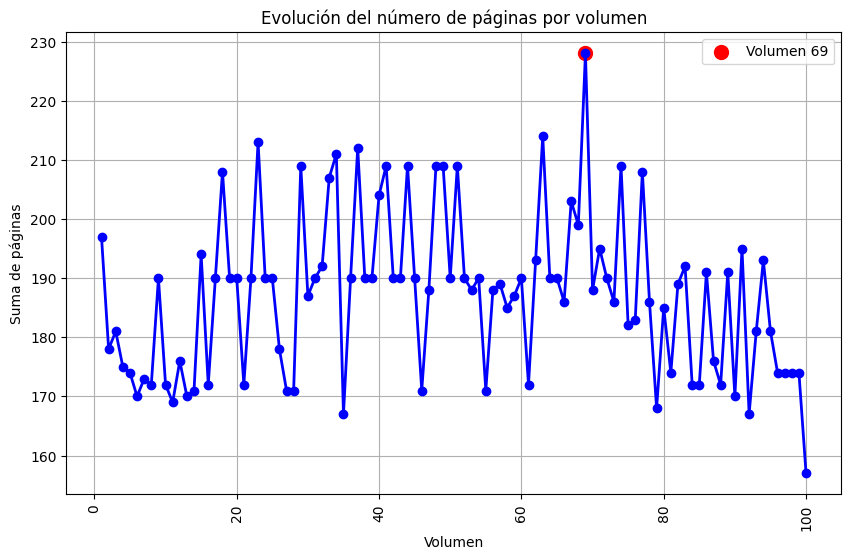

In [37]:
datos_por_tomo = capitulosop.groupby('Volumen')['Paginas'].sum()

plt.figure(figsize=(10, 6))
plt.plot(datos_por_tomo.index, datos_por_tomo.values, marker='o', color='blue', linewidth=2)

volumen_pico_maximo = datos_por_tomo.idxmax()
numero_paginas_pico_maximo = datos_por_tomo.max()

plt.scatter(volumen_pico_maximo, numero_paginas_pico_maximo, color='red', s=100, label='Volumen {}'.format(volumen_pico_maximo))

plt.xlabel('Volumen')
plt.ylabel('Páginas')
plt.title('Evolución del número de páginas por volumen')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

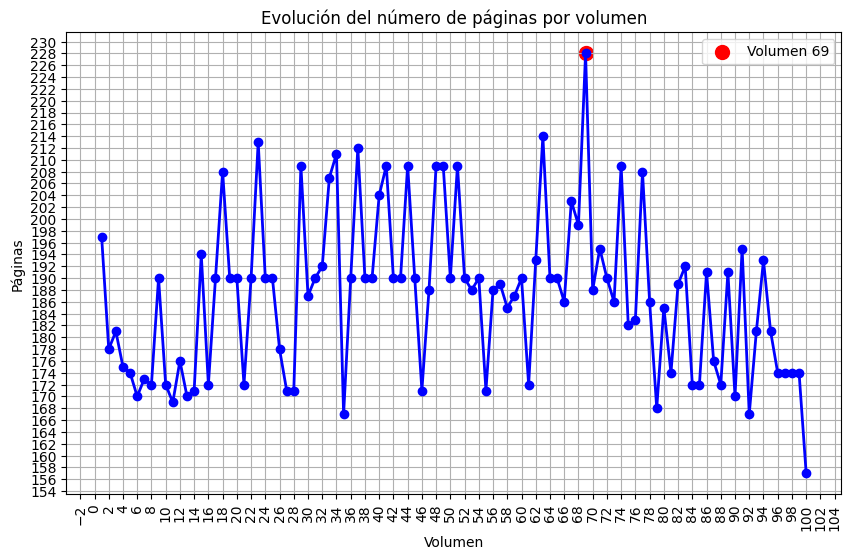

In [49]:
datos_por_tomo = capitulosop.groupby('Volumen')['Paginas'].sum()

plt.figure(figsize=(10, 6))
plt.plot(datos_por_tomo.index, datos_por_tomo.values, marker='o', color='blue', linewidth=2)

volumen_pico_maximo = datos_por_tomo.idxmax()
numero_paginas_pico_maximo = datos_por_tomo.max()

plt.scatter(volumen_pico_maximo, numero_paginas_pico_maximo, color='red', s=100, label='Volumen {}'.format(volumen_pico_maximo))

plt.xlabel('Volumen')
plt.ylabel('Páginas')
plt.title('Evolución del número de páginas por volumen')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()

# Ajusta el tamaño de fuente en el eje y y establece los ticks en incrementos de 2
plt.tick_params(axis='y', labelsize=10)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(2))

# Establece los ticks en el eje x en incrementos de 2
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2))

plt.show()